In [56]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
df= pd.read_csv('C:/Users/simhaj-local/Documents/GitHub/NordPole_Price/Hourly/CSVFiles/2018/06.elspot-prices_2018_hourly.csv')

In [59]:
#df.tail()

In [60]:
df['Date'] = pd.to_datetime(df['Date'])

In [61]:
#df.head()

In [62]:
df.set_index('Date', inplace=True)

In [63]:
df.head()

,Hours,SE1,SE2,SE3,SE4
Date,,,,,
2018-01-01,00 - 01,258.86,258.86,258.86,258.86
2018-01-01,01 - 02,259.85,259.85,259.85,259.85
2018-01-01,02 - 03,256.60,256.60,256.60,256.60
2018-01-01,03 - 04,242.84,242.84,242.84,242.84
2018-01-01,04 - 05,243.23,243.23,243.23,243.23


In [64]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01', '2018-01-01',
               '2018-01-01', '2018-01-01', '2018-01-01', '2018-01-01',
               '2018-01-01', '2018-01-01',
               ...
               '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31',
               '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31',
               '2018-12-31', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=8761, freq=None)

In [65]:
df.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
SE1,8760.0,454.584570,121.724874,16.65,387.0050,461.200,522.9575,2573.41
SE2,8760.0,454.584570,121.724874,16.65,387.0050,461.200,522.9575,2573.41
SE3,8760.0,457.776066,126.850645,16.65,387.3725,461.420,525.1125,2573.41
SE4,8760.0,476.564482,149.086431,16.65,391.4750,466.015,547.6700,2573.41


In [66]:
from pandas.plotting import scatter_matrix

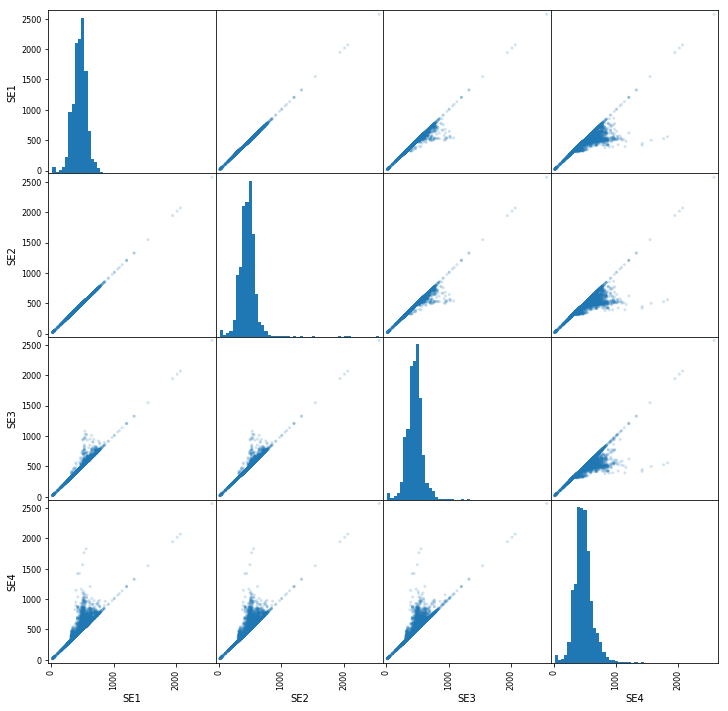

In [122]:
scatter_matrix(df, figsize=(12,12), alpha= 0.2, hist_kwds={'bins':50});

In [125]:
from matplotlib.finance import candlestick_ohlc

ModuleNotFoundError: No module named 'matplotlib.finance'

In [108]:
from matplotlib.dates import DateFormatter,date2num, DayLocator, WeekdayLocator, MONDAY #WeekdayLocator

In [109]:
df_reset = df.loc['2018'].reset_index()

In [110]:
df_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 6 columns):
Date     8761 non-null datetime64[ns]
Hours    8761 non-null object
SE1      8760 non-null float64
SE2      8760 non-null float64
SE3      8760 non-null float64
SE4      8760 non-null float64
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 410.8+ KB


In [111]:
df_reset['date_ax'] = df_reset['Date'].apply(lambda date: date2num(date))

In [112]:
df_reset.head()

,Date,Hours,SE1,SE2,SE3,SE4,date_ax
0,2018-01-01,00 - 01,258.86,258.86,258.86,258.86,736695.0
1,2018-01-01,01 - 02,259.85,259.85,259.85,259.85,736695.0
2,2018-01-01,02 - 03,256.60,256.60,256.60,256.60,736695.0
3,2018-01-01,03 - 04,242.84,242.84,242.84,242.84,736695.0
4,2018-01-01,04 - 05,243.23,243.23,243.23,243.23,736695.0


In [113]:
list_of_cols = ['date_ax', 'Hours', 'SE1']

df_values =[tuple(vals) for vals in df_reset[list_of_cols].values]

In [114]:
df_values;

In [118]:
mondays = WeekdayLocator(MONDAY) #WeekdayLocator
alldays = DayLocator()
weekFormatter = DateFormatter('%b,%d')
dayFormatter = DateFormatter('%d')

NameError: name 'candlestick_ohlc' is not defined

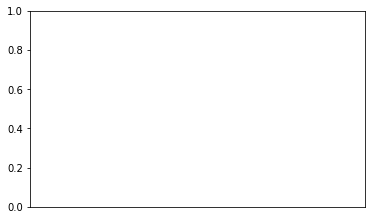

In [119]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, df_values, width = 0.5, colorup ='g', colordown='r');

In [68]:
#Step 2

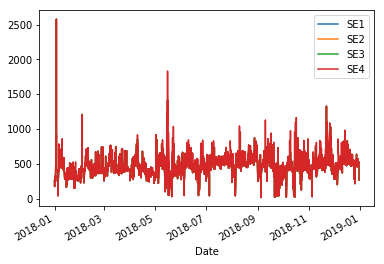

In [69]:
df.plot()

In [70]:
time_series =df['SE1']

In [71]:
type(time_series)

pandas.core.series.Series

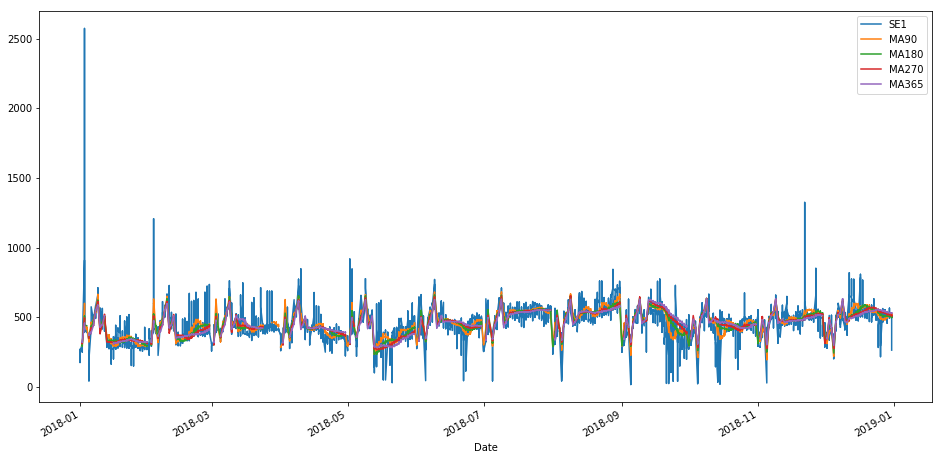

In [44]:
df['MA90'] = df['SE1'].rolling(90).mean()
df['MA180'] = df['SE1'].rolling(180).mean()
df['MA270'] = df['SE1'].rolling(270).mean()
df['MA365'] = df['SE1'].rolling(365).mean()
df[['SE1','MA90', 'MA180','MA270','MA365']].plot(figsize=(16,8))

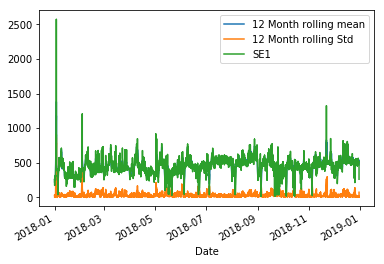

In [72]:
time_series.rolling(12).mean().plot(label= '12 Month rolling mean')
time_series.rolling(12).std().plot(label= '12 Month rolling Std')
time_series.plot()
plt.legend()

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [74]:
decomp = seasonal_decompose(time_series, freq=30)

ValueError: This function does not handle missing values

In [75]:
decompo.plot()

NameError: name 'decompo' is not defined

In [76]:
fig = decomp.plot()
fig.set_size_inches(15,8)

NameError: name 'decomp' is not defined